In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [2]:
re = pd.read_csv('Real Estate.csv')

In [3]:
re.head()

,Bed Room,BHK,Place,Price,Sq Ft,Dealer Type
0,2,BHK,Kolkata,62.37,945,Broker
1,2,BHK,Kolkata,79.56,1170,Broker
2,3,BHK,Kolkata,75.00,1090,Broker
3,3,BHK,Kolkata,62.67,1177,Broker
4,2,BHK,Kolkata,77.02,983,Broker


In [4]:
re.describe()

,Bed Room,Price,Sq Ft
count,10611.000000,10611.000000,10611.000000
mean,2.283574,41.369428,991.451701
std,0.654552,20.708305,333.792368
min,1.000000,5.000000,155.000000
25%,2.000000,26.080000,794.500000
50%,2.000000,36.110000,952.000000
75%,3.000000,52.650000,1164.000000
max,4.000000,99.990000,3604.000000


In [5]:
df = re

In [6]:
df.head()

,Bed Room,BHK,Place,Price,Sq Ft,Dealer Type
0,2,BHK,Kolkata,62.37,945,Broker
1,2,BHK,Kolkata,79.56,1170,Broker
2,3,BHK,Kolkata,75.00,1090,Broker
3,3,BHK,Kolkata,62.67,1177,Broker
4,2,BHK,Kolkata,77.02,983,Broker


# Create Label from Dealer Type

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le_dealer_type = LabelEncoder()

In [9]:
df['Dealer'] = le_dealer_type.fit_transform(df['Dealer Type'])

In [10]:
df.drop(['Dealer Type'], axis = 1, inplace = True)

In [11]:
df.head()

,Bed Room,BHK,Place,Price,Sq Ft,Dealer
0,2,BHK,Kolkata,62.37,945,0
1,2,BHK,Kolkata,79.56,1170,0
2,3,BHK,Kolkata,75.00,1090,0
3,3,BHK,Kolkata,62.67,1177,0
4,2,BHK,Kolkata,77.02,983,0


# Implement Linear Regression

In [12]:
df.head()

,Bed Room,BHK,Place,Price,Sq Ft,Dealer
0,2,BHK,Kolkata,62.37,945,0
1,2,BHK,Kolkata,79.56,1170,0
2,3,BHK,Kolkata,75.00,1090,0
3,3,BHK,Kolkata,62.67,1177,0
4,2,BHK,Kolkata,77.02,983,0


## Scatter Plot

Text(0.5, 1.0, 'Linear Regression')

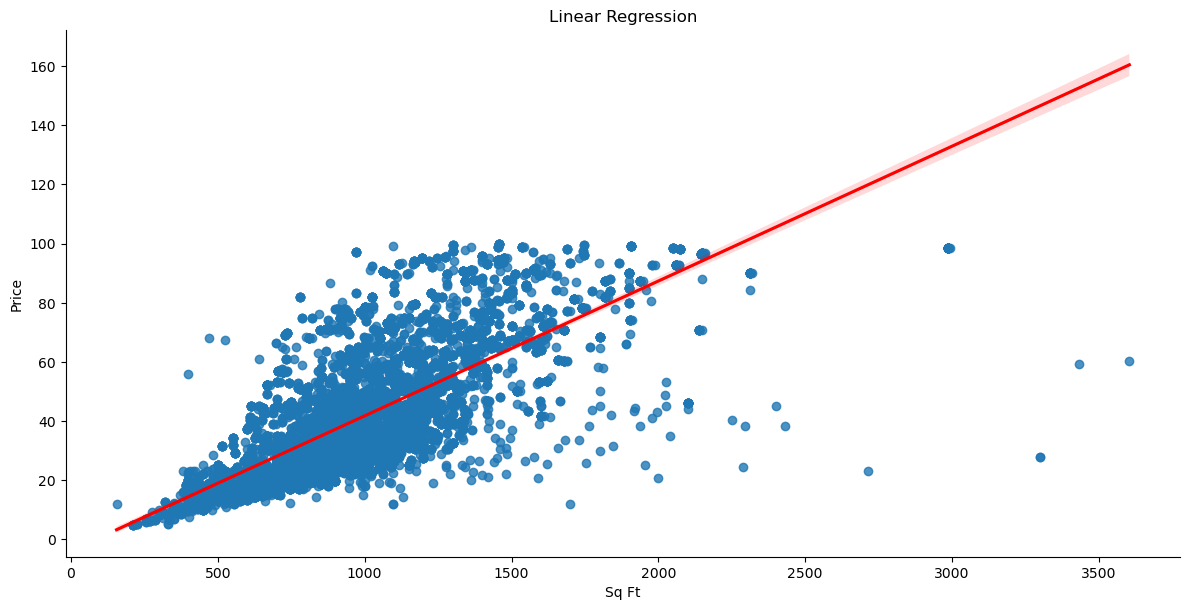

In [13]:
sns.lmplot(x='Sq Ft', y='Price',line_kws={"color":'red'},aspect=2,height=6,data=df)
plt.title('Linear Regression')

In [14]:
x = df[['Bed Room', 'Sq Ft', 'Dealer']]
y = df.Price

In [15]:
lr = linear_model.LinearRegression()

In [16]:
lr.fit(x.values, y.values)

LinearRegression()

In [17]:
lr.coef_

array([ 0.86202887,  0.0443652 , -3.12452207])

In [18]:
lr.intercept_

-4.541447568358443

In [19]:
lr.score(x.values,y)

0.5407966799072943

### Dealer 
0 = Broker, 1 = Builder & 2 = Individual

## Predicts price in sequence of No. of Bed Rooms, Sq. Ft. and Dealer type

In [20]:
import joblib

In [21]:
joblib.dump(lr,'real_estate_ml_model')

['real_estate_ml_model']